# Kernel Perceptron

## Binary primal perceptron for reference

```python
def find_label(w, x, b):
    return np.sign(np.dot(w,x) + b)
    
def run_perceptron(inputs, labels):
    num_rows, num_columns = np.shape(inputs)
    w = np.zeros(num_columns)
    b = 0
    correct = 0
    shuffled = np.random.permutation(num_rows)

    
    while correct != num_rows:
        correct = 0
        for i in shuffled:
            x = inputs[i]
            y = labels[i]
            predicted_label = y * find_label(w, x, b)
            
            if predicted_label <= 0:
                w += y * x
                b += y
            else:
                correct += 1
    
    return w, b
```

In [1]:
import numpy as np

In [6]:
data1 = np.loadtxt('kernel-files/data1.txt')
data2 = np.loadtxt('kernel-files/data2.txt')

In [7]:
data1.shape, data2.shape

((76, 3), (60, 3))

## Kernel Perceptron implementation, with a polynomial and gaussian kernel

In [46]:
def rbf_kernel(x, z, s):
    return np.exp(-1*np.linalg.norm(x-z)**2/s**2)

In [45]:
def polynomial_kernel(x, z, d = 2):
    return (1 + np.dot(x, z)) ** d

In [82]:
def find_label(a, y, x_train, x_new, b, kernel_type='polynomial', d=2, s=1):
    counter = 0
    for j in range(len(a)):
        if kernel_type == 'polynomial':
            counter += a[j] * y[j] * polynomial_kernel(x_train[j], x_new, d)
        elif kernel_type == 'rbf':
            counter += a[j] * y[j] * rbf_kernel(x_train[j], x_new, s)
        else:
            raise ValueError("Invalid kernel_type. Expected 'polynomial' or 'rbf'.")
    return np.sign(counter + b)

In [83]:
def run_perceptron(inputs, labels, kernel_type='polynomial', d=2, s=1):
    num_rows = np.shape(inputs)[0]
    a = np.zeros(num_rows)
    b = 0
    correct = 0 

    while correct != num_rows:
        correct = 0
        for i in range(len(inputs)):
            xi = inputs[i]
            yi = labels[i]
            predicted_label = find_label(a, labels, inputs, xi, b, kernel_type, d, s)
            
            if predicted_label * yi <= 0:
                a[i] += 1
                b += yi
            else:
                correct += 1
    
    return a, b

In [62]:
X_data1 = data1[:,[0,1]]
y_data1 = data1[:,2]

In [51]:
X_data2 = data2[:,[0,1]]
y_data2 = data2[:,2]

## Part A

In [80]:
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

In [99]:
def plot_decision_regions(X, y, a, b, kernel_type='polynomial', d=2, s=1, resolution=0.02):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    
    Z = np.array([find_label(a, y, X, np.array([x1, x2]), b, kernel_type, d, s) 
                  for x1, x2 in zip(np.ravel(xx1), np.ravel(xx2))])
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap='plasma')
    plt.set_cmap('coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.show()

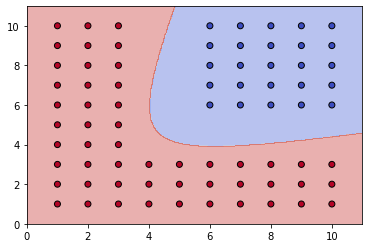

In [100]:
a, b = run_perceptron(X_data1, y_data1)

plot_decision_regions(X_data1, y_data1, a, b)

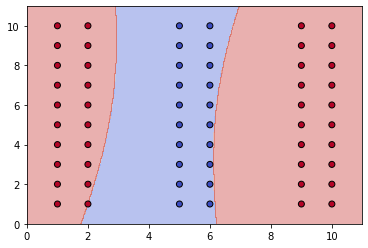

In [101]:
a, b = run_perceptron(X_data2, y_data2)

plot_decision_regions(X_data2, y_data2, a, b)

## Part B

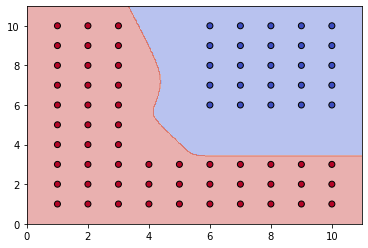

In [110]:
a, b = run_perceptron(X_data1, y_data1, kernel_type='rbf')
plot_decision_regions(X_data1, y_data1, a, b, kernel_type='rbf')

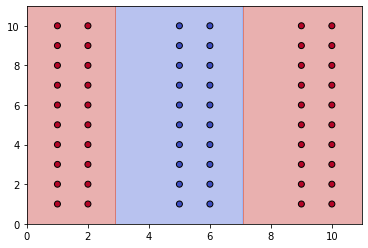

In [111]:
a, b = run_perceptron(X_data2, y_data2, kernel_type='rbf')
plot_decision_regions(X_data2, y_data2, a, b, kernel_type='rbf')

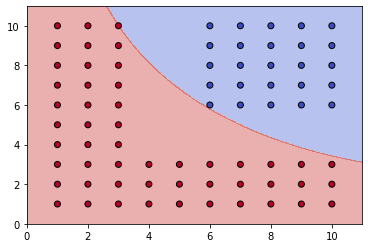

In [112]:
a, b = run_perceptron(X_data1, y_data1, kernel_type='rbf', s=50)
plot_decision_regions(X_data1, y_data1, a, b, kernel_type='rbf', s=50)

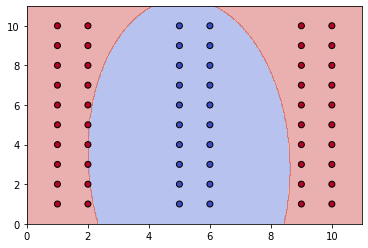

In [113]:
a, b = run_perceptron(X_data2, y_data2, kernel_type='rbf', s=50)
plot_decision_regions(X_data2, y_data2, a, b, kernel_type='rbf', s=50)